<a href="https://colab.research.google.com/github/Ryushin96/AL/blob/main/2110173_%E6%A3%AE%E7%94%B0%E9%9A%86%E5%BF%83_%E4%B8%AD%E9%96%93%E3%83%AC%E3%83%9D%E3%83%BC%E3%83%88%E8%AA%B2%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

機械学習中間レポート課題
2110173 森田隆心

**1.概要**

異なる教師あり機械学習について比較検討を行う。

**2.検証内容**

機械学習を行う題材として「タイタニック号の生存」を選択した。通常の事故ならば生存はランダムだが、タイタニック号事件に関しては沈没するまでに時間があり、救命ボートに乗せる人の選択があったと考えられる。よって乗船者のパラメータで機械学習ができると考えた。
実験前の認識としては「子供や老人」「女性」「高階級者」などが生存率が高いと予想している。この認識を踏まえて「決定木」「線形SVM」「ナイーブベイズ」を利用して機械学習を行った。

**3.決定木による学習**


決定木について機械学習に使えるデータのみを抽出した。機械学習に用いるパラメータの検討は行わなかったときの結果を以下に示す。なお簡単なプログラムについての説明はコメントアウト機能にて示す。

In [ ]:
#ファイルのアップロード(train.csvを選択する)
from google.colab import files
upload = files.upload()




Saving train.csv to train.csv


In [ ]:
#ファイルの読み込み
import pandas as pd
import io
df0 = pd.read_csv('train.csv')
df0.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


今回使用するパラメータは[Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]である。これはそれぞれ[生存有無, チケットクラス, 性別, 同乗している兄弟/配偶者の数, 同乗している親/子供の数, 料金, 出航地]である。

目的のパラメータ以外は削除した。

また、今回使用するファイルには欠損箇所がいくつか見られるため、欠損箇所が1つでもある行はすべて削除することにした。

In [ ]:
#不要なカラムの削除
df = df0.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#欠損箇所の確認
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
#欠損がある行をすべて削除
df.dropna(inplace=True)

機械学習が行えるように文字を数字に変更した。

性別について、男性は１、女性は０。
出航地について、Sは0, Cは1, Qは2になるように設定した。

In [ ]:
df.replace('male',1, inplace = True )
df.replace('female',0, inplace = True )
df.replace('S',0, inplace = True )
df.replace('C',1, inplace = True )
df.replace('Q',2, inplace = True )

df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


以上で機械学習を行うデータの処理ができた。

決定木について、特徴量を['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']、
クラスを['Survived']とした。

さらにトレーニングデータとテストデータに分割した。トレーニングデータを0.8、テストデータを0.2に設定した。

In [ ]:
#特徴量とクラスを分ける
from sklearn.model_selection import train_test_split

feature = df.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']] #locはその部分を取り出すという意味
target = df.loc[:, ['Survived']]

In [ ]:
#トレーニングデータとテストデータに分ける トレーニング8割　ランダムにとる

x_feature, y_feature, x_target, y_target =train_test_split(feature, target, train_size = 0.8,random_state=10)

トレーニングデータとテストデータを用いて決定木機械学習を行った。また、今回はエントロピーによる決定木を用いた。

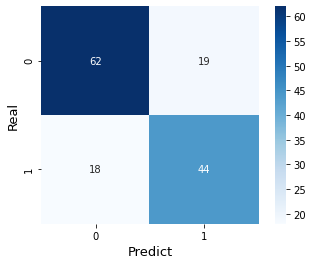

In [ ]:
#ここから決定木の機械学習を開始
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_feature, x_target)
predicted = clf.predict(y_feature)

from sklearn.metrics import confusion_matrix
#confusion_matrix(y_target, predicted)

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_target, predicted)
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues')
plt.xlabel("Predict", fontsize=13)
plt.ylabel("Real", fontsize=13)
plt.savefig('sklearn_confusion_matrix.png')




In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('正解率 : ',accuracy_score(y_target, predicted))
print('再現率 : ',precision_score(y_target, predicted))
print('適合率 : ',recall_score(y_target, predicted))
print('F値    : ',f1_score(y_target, predicted))

正解率 :  0.7412587412587412
再現率 :  0.6984126984126984
適合率 :  0.7096774193548387
F値    :  0.704


In [ ]:
#ツリーを視覚的にするインストール
!pip install pydotplus
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


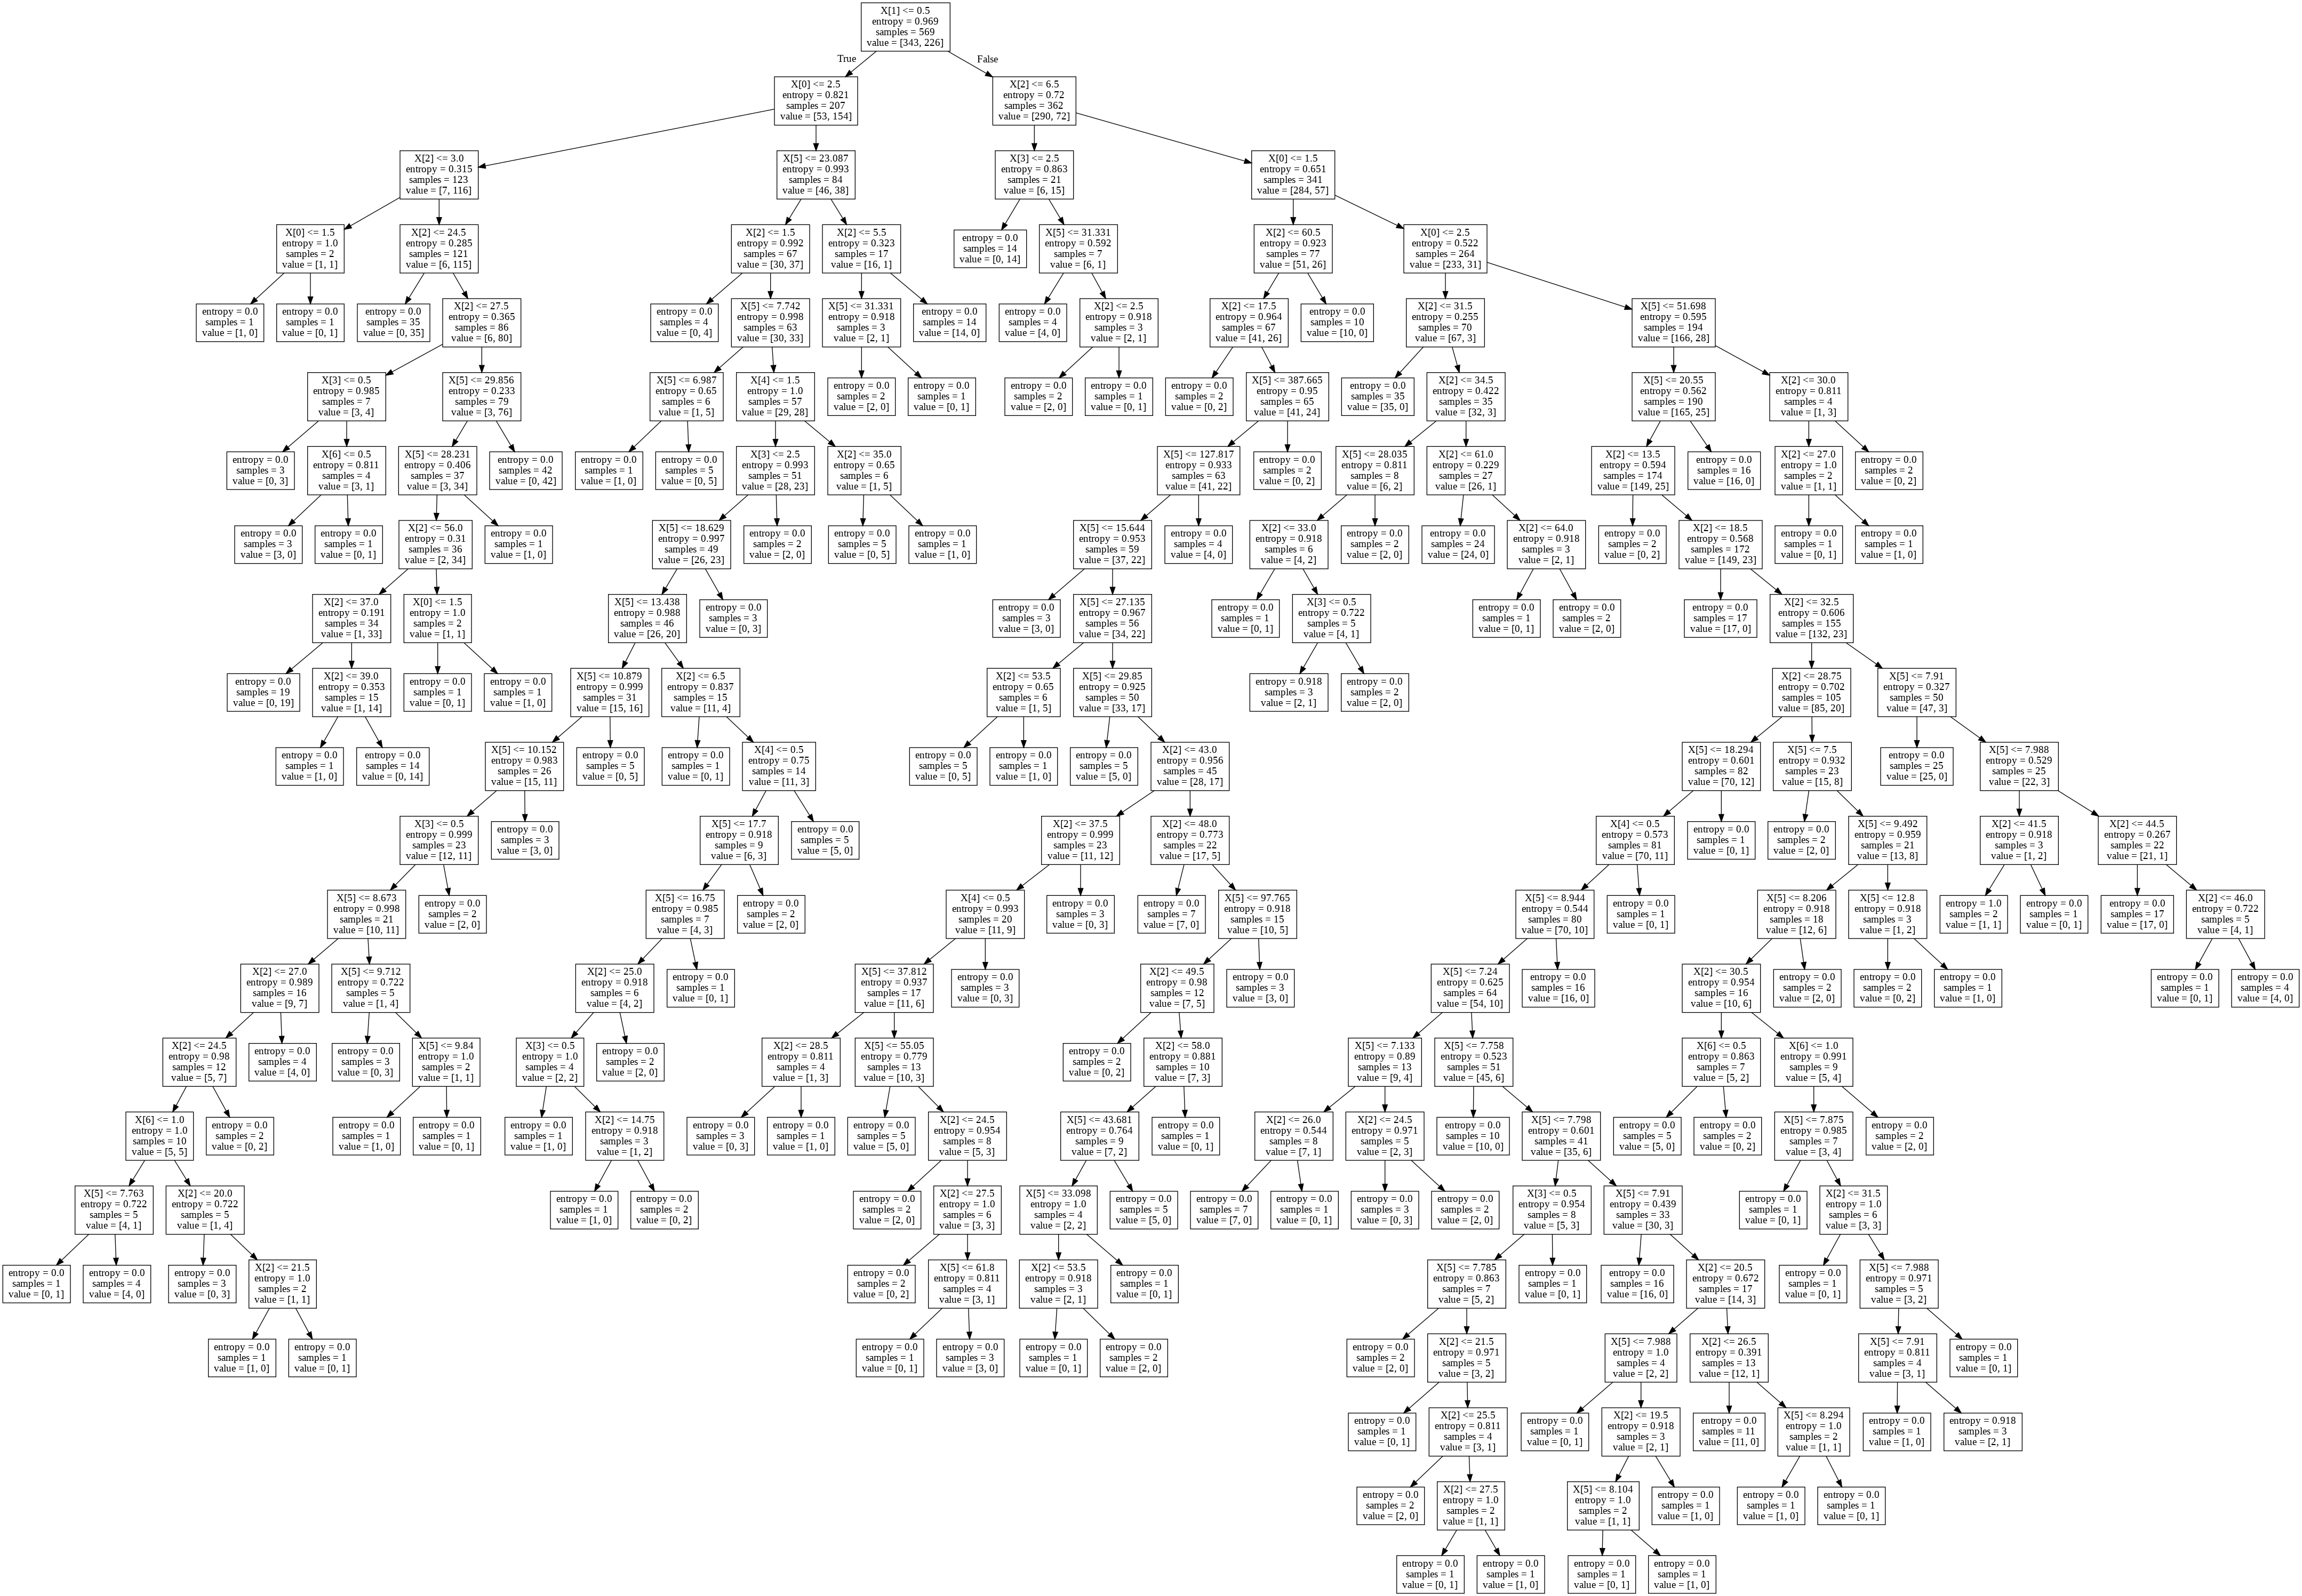

In [ ]:
#可視化

import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

以上の結果から検討を行う。何もしない状態でも正解率は75%であることが分かった。また、決定木のルート付近を見ると、性別やクラス、年齢が重要であることが分かった。出航地については[0,1,2]にすると大小比較されているためうまく分類できていないと考えられる。

これらの結果を踏まえ、いくつかのパラメータについて検討する。


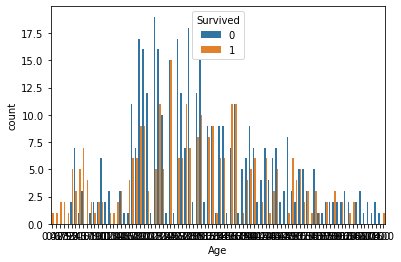

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Age", hue="Survived",data=df)

年齢を見てみると年少者の生存率は高く、それ以外は高齢者に関わらず生存率が低いことが分かる。

よって年齢を細かく分けずに子供か大人かという簡単なパラメータに変更することにした。

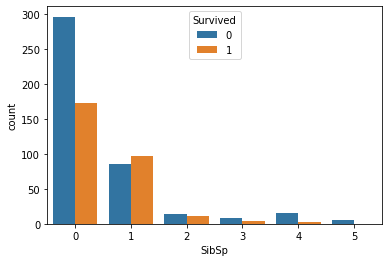

In [ ]:
sns.countplot(x="SibSp", hue="Survived",data=df)

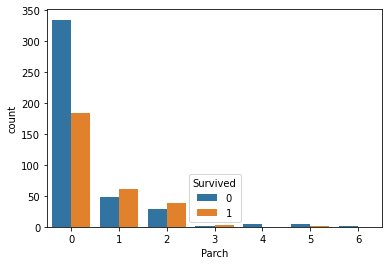

In [ ]:
sns.countplot(x="Parch", hue="Survived",data=df)

上図は家族構成に関する生存率のグラフである。単身者は生存率が低くいことが分かった。

分かりやすくするため新たに[FamilySize]というパラメータを用いることにした。

なお、FamilySize=SibSp+Parch+1である。

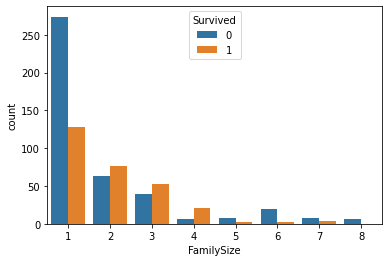

In [ ]:
#FamilySizeの検討
df1 = df0.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
df1.dropna(inplace=True)
df1['FamilySize'] = df1['Parch'] + df1['SibSp'] + 1 

sns.countplot(x="FamilySize", hue="Survived",data=df1)

上図から、単身者は生存率が低く、2~4人家族の場合生存率が高く、それ以上の家族は生存率が低くなっていることが分かった。

以上の結果から年齢と家族、出航地についてダミー変数を用いてデータを変更した。
年齢について20歳以上をadultとした。
家族について単身者をalone, 2~4人家族をsmall, 5人以上をbigとした。


In [ ]:
#Embarked,Sexを変更してみる
df2 = df0.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
df2.dropna(inplace=True)
df2 = pd.concat([df2, pd.get_dummies(df2["Embarked"])], axis=1)
df2 = pd.concat([df2, pd.get_dummies(df2["Sex"])], axis=1)
df2 = df2.drop(columns=["Embarked"])
df2 = df2.drop(columns=["Sex"])

df2['FamilySize'] = df2['Parch'] + df2['SibSp'] + 1 
df2.loc[df2['FamilySize']==1,'Family'] = 'alone'
df2.loc[(df2['FamilySize']>=2) & (df2['FamilySize']<=4),'Family'] = 'small'
df2.loc[(df2['FamilySize']>=5),'Family'] = 'big'
df2 = pd.concat([df2, pd.get_dummies(df2["Family"])], axis=1)
#df2 = df2.drop(columns=["FamilySize"])

df2.loc[(df2['Age']>=20),'Age_bin'] = 'adult'
df2 = pd.concat([df2, pd.get_dummies(df2["Age_bin"])], axis=1)
df2 = df2.drop(columns=["Age_bin"])


df2

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,FamilySize,Family,alone,big,small,adult
0,0,3,22.0,1,0,7.2500,0,0,1,0,1,2,small,0,0,1,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,2,small,0,0,1,1
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,1,alone,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,1,0,2,small,0,0,1,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,1,1,alone,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,1,0,1,0,6,big,0,1,0,1
886,0,2,27.0,0,0,13.0000,0,0,1,0,1,1,alone,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,1,1,0,1,alone,1,0,0,0
889,1,1,26.0,0,0,30.0000,1,0,0,0,1,1,alone,1,0,0,1


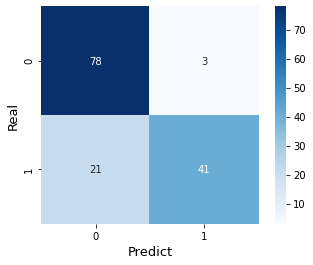

In [ ]:
feature2 = df2.loc[:, ['Pclass','adult', 'Fare', 'Q', 'C', 'S', 'male','female', 'alone', 'small', 'big']]
target2 = df2.loc[:, ['Survived']]
#トレーニングデータとテストデータに分ける トレーニング8割　ランダムにとる
x_feature2, y_feature2, x_target2, y_target2 =train_test_split(feature2, target2, train_size = 0.8,random_state=10)
#ここから決定木の機械学習を開始
clf2 = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 5)
clf2 = clf2.fit(x_feature2, x_target2)
predicted2 = clf2.predict(y_feature2)

cm = confusion_matrix(y_target2, predicted2)
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues')
plt.xlabel("Predict", fontsize=13)
plt.ylabel("Real", fontsize=13)
plt.savefig('sklearn_confusion_matrix.png')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('正解率 : ',accuracy_score(y_target2, predicted2))
print('再現率 : ',precision_score(y_target2, predicted2))
print('適合率 : ',recall_score(y_target2, predicted2))
print('F値    : ',f1_score(y_target2, predicted2))

正解率 :  0.8321678321678322
再現率 :  0.9318181818181818
適合率 :  0.6612903225806451
F値    :  0.7735849056603773


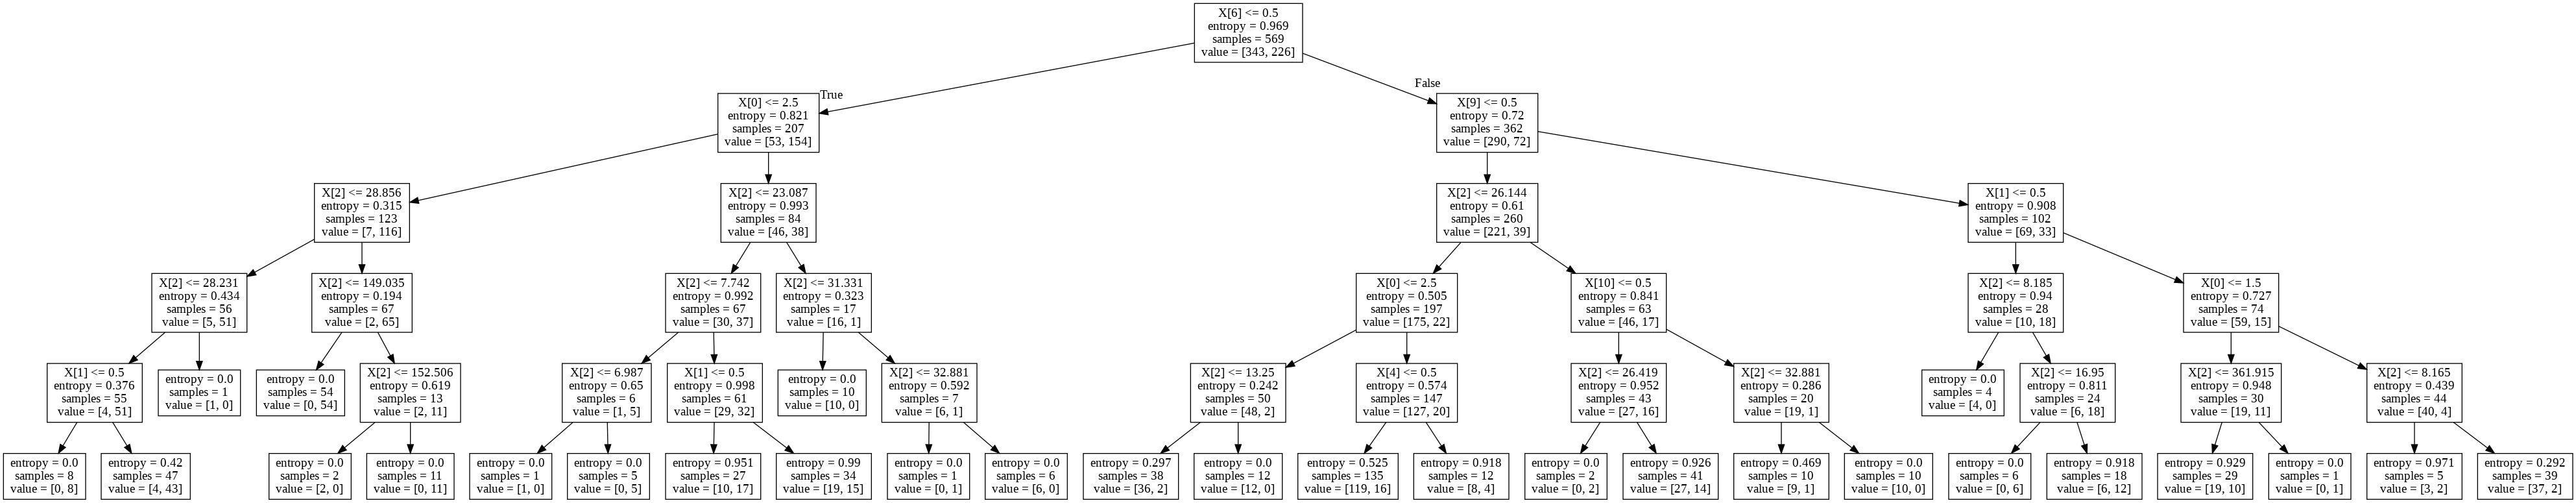

In [ ]:
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

dot_data = StringIO()
tree.export_graphviz(clf2, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

以上の結果により、判断をシンプルにさせることによって正解率を83%程度まで上昇させることができた。決定木の深さについては5が最適であることが分かった。

ルートノード付近を見ると、性別、クラス、家族構成が重要になっていることが分かった。

検討前の予想では「子供や老人」「女性」「高階級者」が生存に関与すると考えていたが、おおむね正しいといえる。しかし、老人に関しては生存率にあまり関与せず、子供か大人かということが大切であることが分かった。
またこれらの要素に加えて家族構成が重要であることが分かった。

**3.SVMによる学習**

2の決定木で作成したデータを利用してSVMの学習にも適用した。
まず2次元のSVMについて必要なパラメータを検討した。

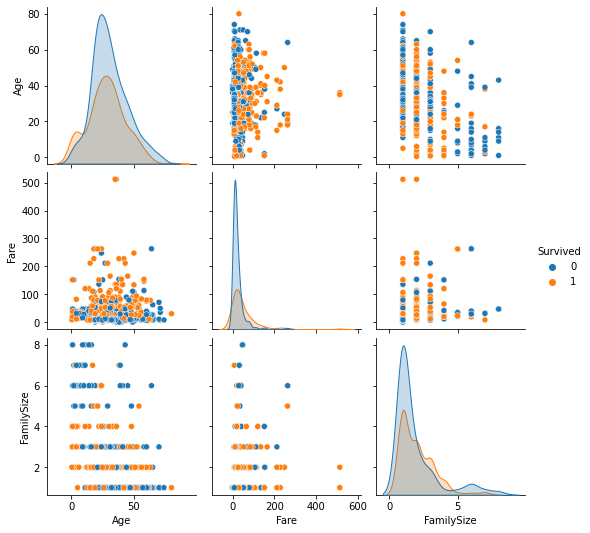

In [ ]:
df3 = df2

import seaborn as sns
sns.pairplot(df2, hue='Survived',vars=['Age', 'Fare', 'FamilySize'])

上図から２次元SVMの利用に、[Age,Fare]を用いることにする。



In [ ]:
#特徴量とクラスを分ける
from sklearn.model_selection import train_test_split

feature3 = df3.loc[:, [ 'Age', 'Fare']] #locはその部分を取り出すという意味
target3 = df3.loc[:, ['Survived']]

#トレーニングデータとテストデータに分ける トレーニング8割　ランダムにとる

x_feature3, y_feature3, x_target3, y_target3 =train_test_split(feature3, target3, train_size = 0.8,random_state=1)

#SVMを利用
from sklearn import svm

clf_s3 = svm.SVC(kernel='linear', C=10)
clf_s3.fit(x_feature3, x_target3)
predicted3 = clf_s3.predict(y_feature3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_target3, predicted3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[82,  3],
       [48, 10]])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('正解率 : ',accuracy_score(y_target3, predicted3))
print('再現率 : ',precision_score(y_target3, predicted3))
print('適合率 : ',recall_score(y_target3, predicted3))
print('F値    : ',f1_score(y_target3, predicted3))

正解率 :  0.6433566433566433
再現率 :  0.7692307692307693
適合率 :  0.1724137931034483
F値    :  0.28169014084507044


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


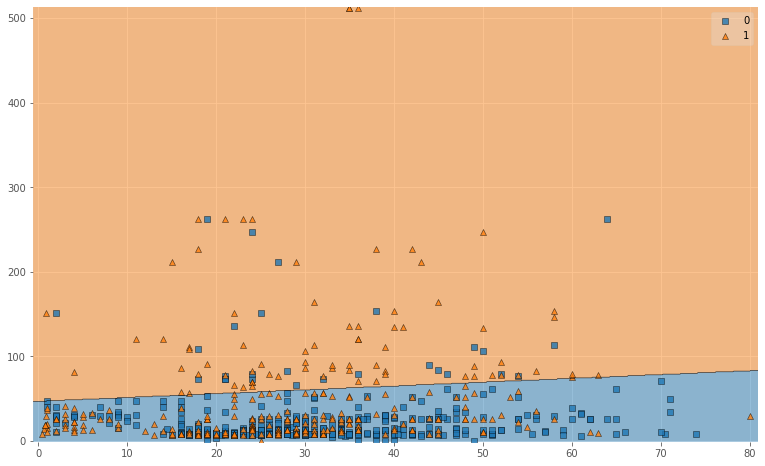

In [ ]:
#可視化

import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

feature_combined_std = np.vstack((x_feature3, y_feature3))
target_combined = np.hstack((x_target3.values.T, y_target3.values.T))
target_combined = np.reshape(target_combined,(-1))

fig = plt.figure(figsize=(13,8))
plot_decision_regions(feature_combined_std, target_combined, clf=clf_s3, res=0.02)
plt.show()

正解率が64%と良くない結果が得られた。２次元SVMではデータの重なりが大きいため多次元SVMを扱うことにした。
扱う特徴量としては決定木で得られた性別、クラス、家族構成を利用することにした。

In [ ]:
#特徴量とクラスを分ける
from sklearn.model_selection import train_test_split

feature4 = df3.loc[:, [ 'Age', 'Fare','Pclass', 'male','alone']] #locはその部分を取り出すという意味
target4 = df3.loc[:, ['Survived']]

#トレーニングデータとテストデータに分ける トレーニング8割　ランダムにとる

x_feature4, y_feature4, x_target4, y_target4 =train_test_split(feature4, target4, train_size = 0.8,random_state=1)

#SVMを利用
from sklearn import svm

clf_s4 = svm.SVC(kernel='linear', C=10)
clf_s4.fit(x_feature4, x_target4)
predicted4 = clf_s4.predict(y_feature4)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_target4, predicted3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[82,  3],
       [48, 10]])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('正解率 : ',accuracy_score(y_target4, predicted4))
print('再現率 : ',precision_score(y_target4, predicted4))
print('適合率 : ',recall_score(y_target4, predicted4))
print('F値    : ',f1_score(y_target4, predicted4))

正解率 :  0.7622377622377622
再現率 :  0.7068965517241379
適合率 :  0.7068965517241379
F値    :  0.7068965517241379


以上の結果により多次元SVMを利用した方が正解率が高くなることが分かった。またCの値を変化させても結果が変わらず、プログラムの実行に時間を要するので省略する。

**4.ナイーブベイズ**

最後にナイーブベイズについて検討する。SVMと同様に機械学習をさせた結果を示す。

In [ ]:
#ナイブベーズを行う

from sklearn.naive_bayes import GaussianNB
clf_n5 = GaussianNB()
clf_n5 = clf_n5.fit(x_feature4, x_target4)
predicted5 = clf_n5.predict(y_feature4)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_target4, predicted5)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[69, 16],
       [20, 38]])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('正解率 : ',accuracy_score(y_target4, predicted5))
print('再現率 : ',precision_score(y_target4, predicted5))
print('適合率 : ',recall_score(y_target4, predicted5))
print('F値    : ',f1_score(y_target4, predicted5))

正解率 :  0.7482517482517482
再現率 :  0.7037037037037037
適合率 :  0.6551724137931034
F値    :  0.6785714285714286


**5.具体的なデータを与えて検証**

最も正解率が高かった決定木で私が生き残ることができるか予想した。
家族で行く場合と１人で行く場合について検討を行う。
4人家族、大人、男性、クラス1で実行した。

[Pclass','adult', 'Fare', 'Q', 'C', 'S', 'male','female', 'alone', 'small', 'big']



In [ ]:
my_feature = [[1,1,300000,1,0,0,1,0,0,1,0]]
predictedMe = clf2.predict(my_feature)

my_feature2 = [[1,1,300000,1,0,0,1,0,1,0,0]]
predictedMe2 = clf2.predict(my_feature2)
print('With Family')
if predictedMe == 1 :
  print('You saved')
if predictedMe == 0 :
   print('You die')

print('Alone')
if predictedMe2 == 1 :
  print('You saved')
if predictedMe2 == 0 :
   print('You died')

With Family
You saved
Alone
You die


以上の結果から家族と一緒に船に乗った場合は生き残り、一人で乗船した場合は死亡することが分かった。これは乗船するときの参考材料になる可能性がある。

**6.結論**

本レポートではタイタニック号の生存の機械学習について、決定木と線形SVM, 多次元SVM, ナイーブベイズについて検討を行った。
それぞれの学習方法について正解率を比較した結果、決定木>多次元SVM>ナイーブベイズ>線形SVM の順で正解率が高いことが分かった。

また、生存に関わる情報として、家族構成や性別、子供かどうかなどが重要になっていることが分かった。